#  TS1: Síntesis de señales
## Autora: Lola Pampin
## Docentes: Mariano Llamedo Soria, Francisco Hernan Ledesma y David Ezequiel Benoit
### 27/08/2025

# I. *Introducción*
En el presente trabajo se resuelven distintas consignas propuestas por la catedra. En primer lugar, se definen funciones que describen distintos tipos de señales (sinusoidales, cuadradas, impulsos), y se realizan los gráficos de todas ellas. A continuación, se analiza la ortogonalidad y correlación cruzada de las funciones planteadas en el primer inciso. Para finalizar se demuestra la validez de la propiedad trigonométrica producto del seno.
## Marco teórico
Para el correcto entendimiento y desarrollo de este informe es necesario definir algunos conceptos claves.
### ***Funciones períodicas***

En primer lugar, se enumera la definición de las funciones utilizadas:

1.	**Función seno**
\begin{equation}
sen (t) = A * sen (2 \cdot \pi \cdot f \cdot t + \phi) + offset
\end{equation}
Donde f es la frecuencia (en [rad]), t es el tiempo (en [s], salvo que se indique lo contrario), $\phi$ es la fase (también en [rad]) y el offset es el valor medio (en [V]).

2.	**Función coseno**
\begin{equation}
cos (t) = A * cos (2 \cdot \pi \cdot f \cdot t + \phi) + offset
\end{equation}
Por supuesto que esta función es análoga la función seno, por lo tanto, sus parámetros son los mismos.

3.	**Función cuadrada**

$$
f(t) =
\begin{cases}
A, & 0 \leq t < \frac{T}{2} \\
-A, & \frac{T}{2} \leq t < T
\end{cases}
\quad \text{f(t)=f(t+T)} 
$$
Donde T es el período de la función y A la amplitud

4.	**Función impulso**
$$
f(t) =
\begin{cases}
A & \text{si } a \leq x \leq b \\
0 & \text{en otro caso}
\end{cases}
$$
Donde a y b es el tiempo al cual comienza y termina el flanco, respectivamente, por lo tanto, $b-a$ es la duración del impulso. A es la amplitud, generalmente dada en [V].

En el presente trabajo se toma a las funciones discretizadas, es decir como una secuencia de puntos, para facilitar su análisis digital.


Seguidamente, se presentan las definiciones correspondientes a los conceptos mencionados en los distintos ítems del trabajo.
### ***Energía y potencia de una señal***

Las secuencias se pueden clasificar según sean de energía o de potencia. Una señal puede ser de potencia, de energía o ninguna, pero nunca ambas.
Se define a la potencia o energía (según corresponda) instantánea para tiempo discreto como $$ x[n].x[n]^{*}=|x[n]|^2 $$
Si x[n] es puramente real, entonces la señal es de energía (por lo que su potencia es igual a 0), y su valor se calcula como 
$$ E = \sum_{n=-\infty}^{\infty} |x[n]|^2$$

Por el contrario, si la energía es infinita, la señal es una señal de potencia, la cual se calcula como $$ P = \lim_{N \to \infty} \frac{1}{2N+1} \sum_{n=-N}^{N} |x[n]|^2$$

En general, las señales períodicas son señales de potencia y las de energía son transitorias (que duran un tiempo finito).


### ***Ortogonalidad de funciones***
Se dice que 2 funciones son ortogonales cuando su producto interno es igual a 0. 
Para analizar la ortogonalidad de las funciones del presente trabajo, se realiza el producto interno punto a punto y se almacena en un array. A continuación, se recorre el array sumando cada uno de los valores. 
$$
N = \sum_{i=1}^{N} f(x_i; y_i) \cdot g(x_i; y_i)
$$
Si el valor de la sumatoria (N) es igual a 0, entonces las funciones son ortogonales.

### ***Correlación cruzadas de funciones***
La correlación cruzada entre funciones mide cuán similares son dos funciones cuando una de ellas se desplaza en el tiempo. Su formula se define mediante la siguiente ecuación:

- Para el caso continuo:

$$
r_{xy}(\tau) = \int_{-\infty}^{\infty} x^*(t) \cdot y(t + \tau) \, d\tau
$$

Para el caso discreto:

$$
r_{xy}(\tau) = \sum_{-\infty}^{\infty} x^*(t) \cdot y(t + \tau) \
$$


Donde $\tau$ representa la demora.

En el caso de la **autocorrelación** ($r_{xx}$), se analiza la variación de una señal en el tiempo (es equivalente a reemplazar y(t) por x(t)). Siempre va a ser una función par ($r_{xx}(\tau)= r_{xx}(-\tau)$), y su valor máximo se va a encontrar en $\tau=0$ ya que se compara la función consigo misma sin lag (es exactamente la misma definición, todos los puntos tienen el mismo valor, por lo tanto, el área bajo la curva es máxima). Este punto se conoce como la energía de la señal, ya que $E = \sum_{n=-\infty}^{\infty} |x[n]|^2 = r_{xx}$. Además, si x(t) es periódica con periodo T, $r_{xx}(\tau)$ es periódica con el mismo periodo. Otro resultado esperable es la disminución de la amplitud de la función de autocorralacion al aumentar el lag (es decir, son inversamente proporcionales). Esto se debe se multiplican “menos periodos”.

### ***Propiedad trigonométrica del producto***

La función seno cumple la propiedad trigonométrica del producto, la cual establece lo siguiente:

$$
2*\sin ( \alpha) * \sin (\beta ) = \cos(\alpha - \beta) - \cos(\alpha + \beta)
$$

Para demostrarla, se requiere la definición de las identidades de suma y diferencia de coseno:
$$
\cos( \alpha - \beta) = \cos (\alpha) * \cos (\beta) + \sin (\alpha) *  \sin (\beta)
$$
$$
\cos(\alpha + \beta) = \cos (\alpha) * \cos (\beta) - \sin (\alpha) * \sin (\beta)
$$

Restando ambas se obtiene:
$$
\cos(\alpha - \beta) - \cos(\alpha + \beta) = (\cos (\alpha) * \cos (\beta) + \sin (\alpha) * \sin (\beta)) - (\cos (\alpha) * \cos (\beta) - \sin (\alpha)  \sin (\beta)) = 2 \sin (\alpha) * \sin (\beta)
$$


# II. *Análisis y desarrollo*
A continuación se detalla el código de las funciones requeridas en el primer inciso y su implementación.


----Datos item a -------
Tiempo entre muestras: 2.5e-05 segundos
Potencia de la señal: 0.5000000000000001
Numero de muestras: 100
------------------------
----Datos item b -------
Tiempo entre muestras: 2.5e-05 segundos
Potencia de la señal: 1.9999999999999998
Numero de muestras: 100
------------------------
----Datos item c -------
Tiempo entre muestras: 2.5e-05 segundos
Potencia de la señal: 0.25000000000000006
Numero de muestras: 100
------------------------
----Datos item d -------
Tiempo entre muestras: 2.5e-05 segundos
Potencia de la señal: 0.36944660112501054
Numero de muestras: 100
------------------------
----Datos item e -------
Tiempo entre muestras: 2.5e-05 segundos
Potencia de la señal: 1.0
Numero de muestras: 100
------------------------
----Datos item f -------
Tiempo entre muestras: 0.001 segundos
Potencia de la señal: 0.1
Numero de muestras: 100
------------------------


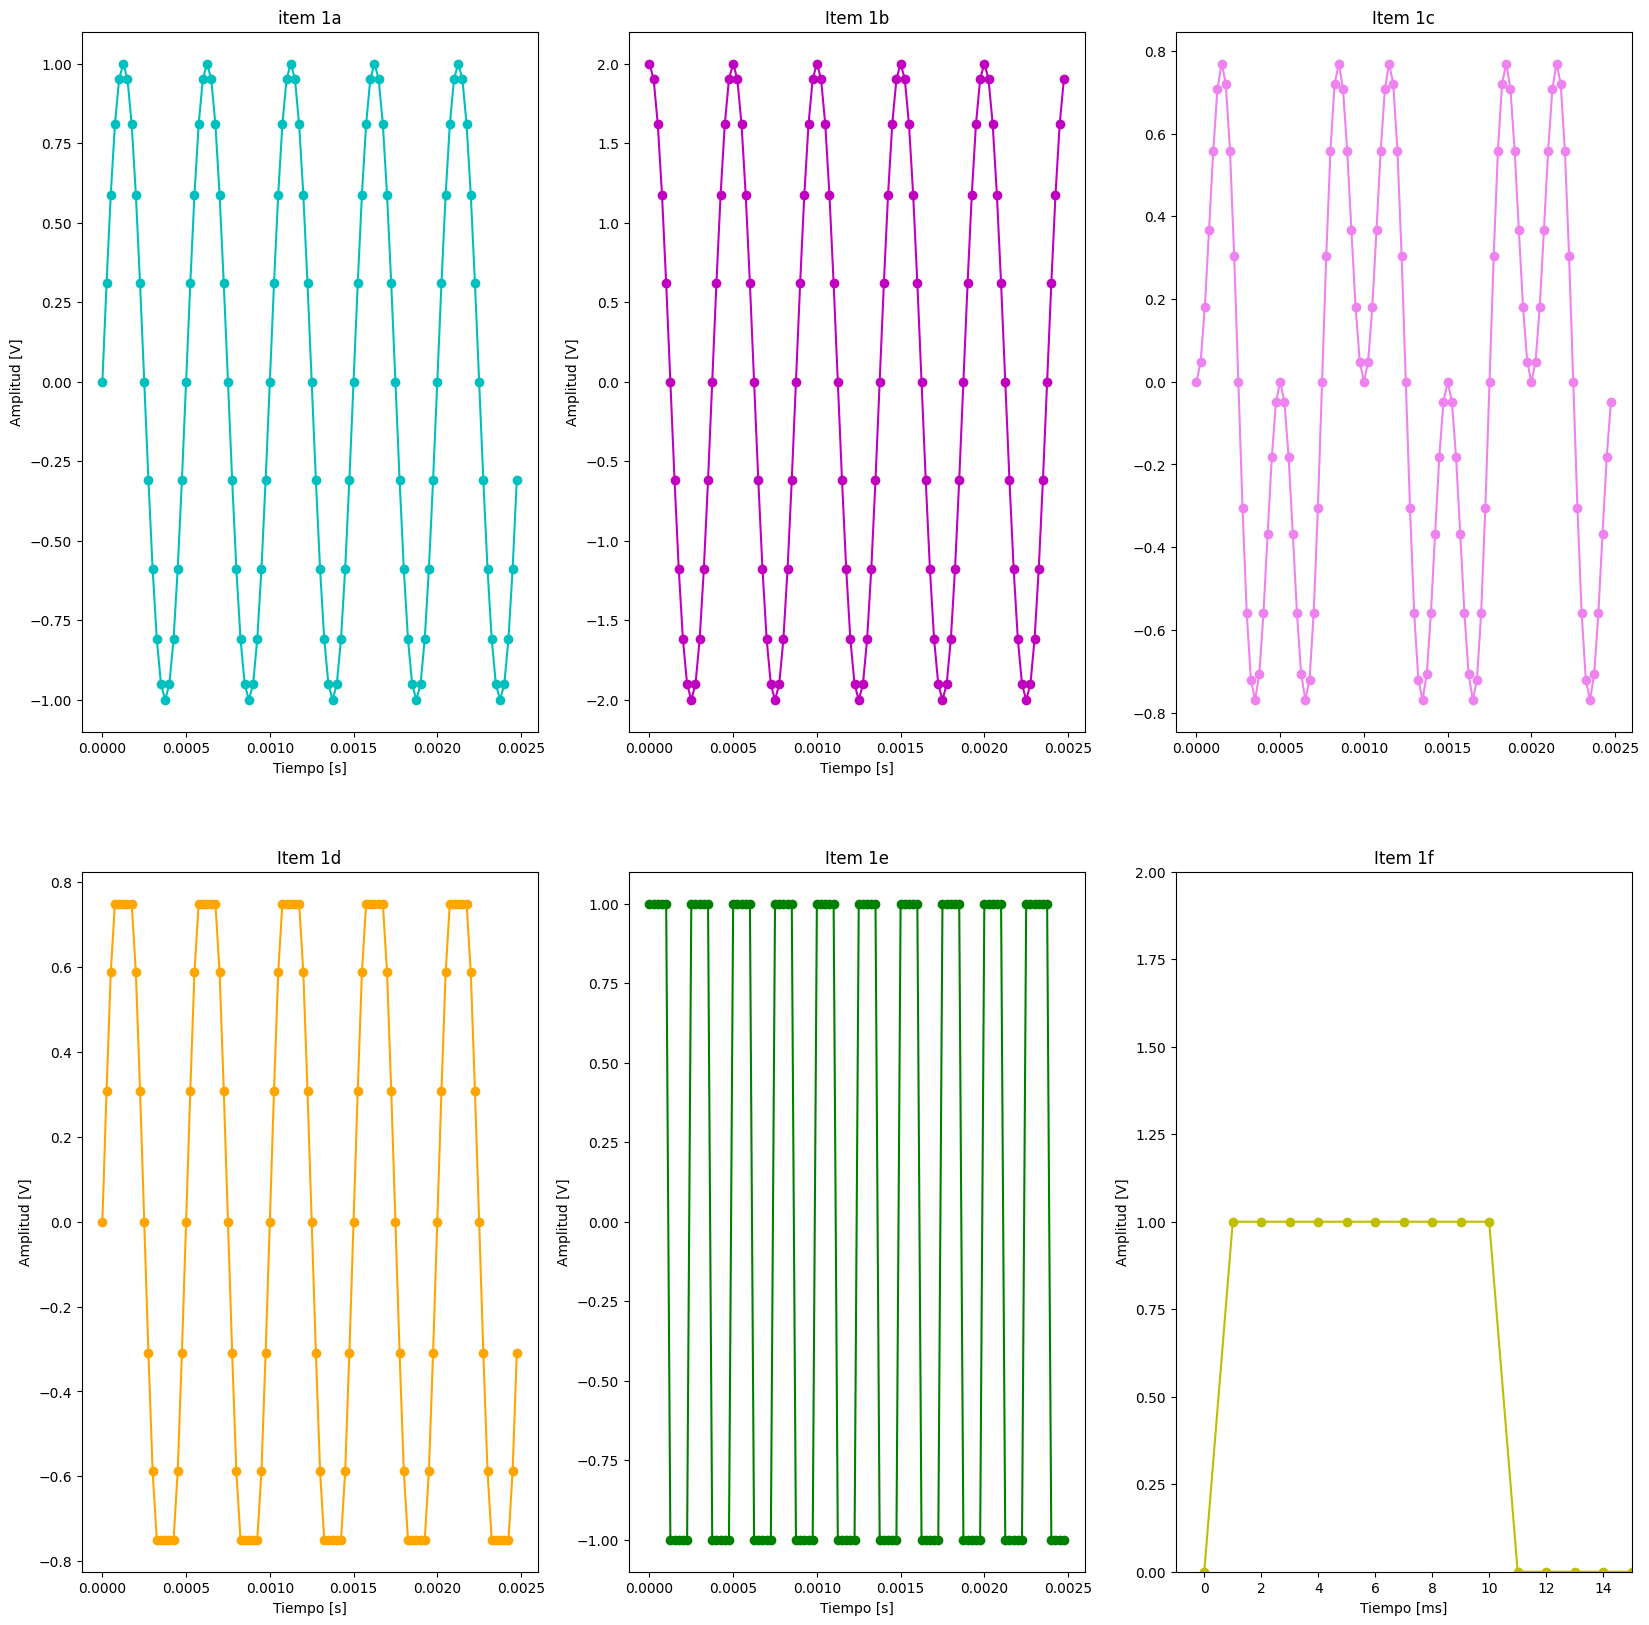

In [1]:
#Librerias
import ts1funciones as ts1
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def mi_funcion_sen (amp = 1, offset = 0, frec = 1, fase=0, N = 1000, frecADC = 1000):
    
    ts= 1/frecADC #tiempo al que se toma cada muestra [s]

    tt = np.arange(start = 0, stop = N*ts, step = ts)

    xx = amp * np.sin( 2 * np.pi * frec * tt + fase) + offset
       
    return tt,xx
def mi_funcion_cos (amp = 1, offset = 0, frec = 1, fase=0, N = 1000, frecADC = 1000):
    
    ts= 1/frecADC #tiempo al que se toma cada muestra [s]

    tt = np.arange(start = 0, stop = N*ts, step = ts)

    xx = amp * np.cos( 2 * np.pi * frec * tt + fase) + offset

    
    return tt,xx
def mi_funcion_cuadrada(offset = 0, frec = 1, fase=0, N = 1000, frecADC = 1000):
    ts= 1/frecADC 
    ttc = np.arange(start = 0, stop = N*ts, step = ts)
    xxc = signal.square(2 * np.pi * frec * ttc + fase)+offset
    tt = np.arange(start = 0, stop = N*ts, step = ts)
    xx = signal.square(2 * np.pi * frec * tt + fase)+offset
    return tt,xx
def mi_funcion_impulso(frecADC=100, N=100, offset=0, fase=0):
    ts= 1/frecADC #tiempo al que se toma cada muestra [s]
    tt = np.arange(start = 0, stop = N*ts, step = ts)
    xx= signal.unit_impulse(len(tt), 'mid')
    return tt,xx
def mi_funcion_item_C (amp = 1, offset = 0, frec = 1, fase=0, N = 1000, frecADC = 1000):
    ts= 1/frecADC #tiempo al que se toma cada muestra [s]

    tt = np.arange(start = 0, stop = N*ts, step = ts)

    xx = np.sin(2*np.pi*frec/2*tt) * (np.sin( 2 * np.pi * frec * tt + fase) + offset)
        
    return tt,xx
def mi_funcion_item_D (amp = 1, offset = 0, frec = 1, fase=0, N = 1000, frecADC = 1000):
    
    ts= 1/frecADC #tiempo al que se toma cada muestra [s]
    tt = np.arange(start = 0, stop = N*ts, step = ts)
    xx = amp * np.sin( 2 * np.pi * frec * tt + fase) + offset  
    valor_corte= amp*0.75 #75% de la amp
    xx=np.clip(xx,-valor_corte,valor_corte)
    return tt,xx
def mi_funcion_item_G(N, ts, xx, item):
    print('----Datos item', item, '-------')
    print ('Tiempo entre muestras:', ts, 'segundos')
    print ('Potencia de la señal:', np.mean(xx**2))
    print ('Numero de muestras:', N)
    print('------------------------')
def mi_funcion_pulso (t0=0,t1=10,N=20, h=1):
    X=np.zeros(N)
    X[t0:t1]=h
    return X

##Invocacion de funciones
#definicion de constantes
N=100
frecADC=40000
t1=11
t0=1
#------------------------------------Ejercicio 1---------------------------------------------------------------

#a) Una señal sinusoidal de 2KHz.
tta,fa=ts1.mi_funcion_sen(1,0,2000,0,N,40000)

#b) Misma señal amplificada y desfazada en π/2.
ttb,fb=ts1.mi_funcion_sen(2,0,2000,np.pi/2,N,40000)

#c) Misma señal modulada en amplitud por otra señal sinusoidal de la mitad de la frecuencia.
ttc,fc=ts1.mi_funcion_item_C(1,0,2000,0,N,40000)

#d) Señal anterior recortada al 75% de su potencia (energia) 
ttd,fd=ts1.mi_funcion_item_D(1,0,2000,0,N,40000)

#e) Una señal cuadrada de 4KHz.
tte,fe=ts1.mi_funcion_cuadrada(0, 4000, 0, N, frecADC = 40000)

#f) Un pulso rectangular de 10ms. --> NO HAY FRECUENCIA UN SOLO 
ff=ts1.mi_funcion_pulso(1,11,N,1)

#g) En cada caso indique tiempo entre muestras, número de muestras y potencia.
ts=1/frecADC
mi_funcion_item_G(N, ts, fa, 'a')
mi_funcion_item_G(N, ts, fb, 'b')
mi_funcion_item_G(N, ts, fc, 'c')
mi_funcion_item_G(N, ts, fd, 'd')
mi_funcion_item_G(N, ts, fe, 'e')
mi_funcion_item_G(N, 0.001, ff, 'f')

# Graficos
plt.figure(figsize=(20,20))
plt.subplot(2,3,1)
plt.title('item 1a')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.plot(tta, fa,'o-', color ='c')

plt.subplot(2,3,2)
plt.title('Item 1b')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.plot(ttb,fb,'o-', color ='m')

plt.subplot(2,3,3)
plt.title('Item 1c')
plt.plot(ttc,fc,'o-', color ='violet')

plt.subplot(2,3,4)
plt.title('Item 1d')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.plot(ttd,fd,'o-', color= 'orange')

plt.subplot(2,3,5)
plt.title('Item 1e')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.plot(tte,fe,'o-', color ='green')

plt.subplot(2,3,6)
plt.title('Item 1f')
plt.axis([-1,15,0,1.5])
plt.xlabel('Tiempo [ms]')
plt.ylabel('Amplitud [V]')
plt.ylim (0,2)
plt.plot(ff,'o-', color = 'y')

plt.show()


Para comprobar la ortogonalidad entre funciones del inciso 1 se implementó el siguiente código:

In [2]:
def mi_funcion_ortogonalidad (f,g):
    valor=np.dot(f,g) #producto interno punto a punto
    if (valor == 0):
        return True
    else: 
        return False
#------------------------------------Ejercicio 2---------------------------------------------------------------
"""2) Verificar ortogonalidad entre la primera señal y las demás. """
#b
if (ts1.mi_funcion_ortogonalidad(fa, fb)):
    print ('la funcion del item a y la del item b son ortogonales')
else:
    print('la funcion del item a y la del item b NO son ortogonales')
#c
if (ts1.mi_funcion_ortogonalidad(fa, fc)):
    print ('la funcion del item a y la del item c son ortogonales')
else:
    print('la funcion del item a y la del item c NO son ortogonales')
#d
if (ts1.mi_funcion_ortogonalidad(fa, fd)):
    print ('la funcion del item a y la del item d son ortogonales')
else:
    print('la funcion del item a y la del item d NO son ortogonales')
#e
if (ts1.mi_funcion_ortogonalidad(fa, fe)):
    print ('la funcion del item a y la del item e son ortogonales')
else:
    print('la funcion del item a y la del item e NO son ortogonales')
#f
if (ts1.mi_funcion_ortogonalidad(fa, ff)):
    print ('la funcion del item a y la del item f son ortogonales')
else:
    print('la funcion del item a y la del item f NO son ortogonales')

la funcion del item a y la del item b NO son ortogonales
la funcion del item a y la del item c NO son ortogonales
la funcion del item a y la del item d NO son ortogonales
la funcion del item a y la del item e NO son ortogonales
la funcion del item a y la del item f NO son ortogonales


Para corroborar la correlación de la funciones, se utilizó la función correlate de la libreria *scypi*

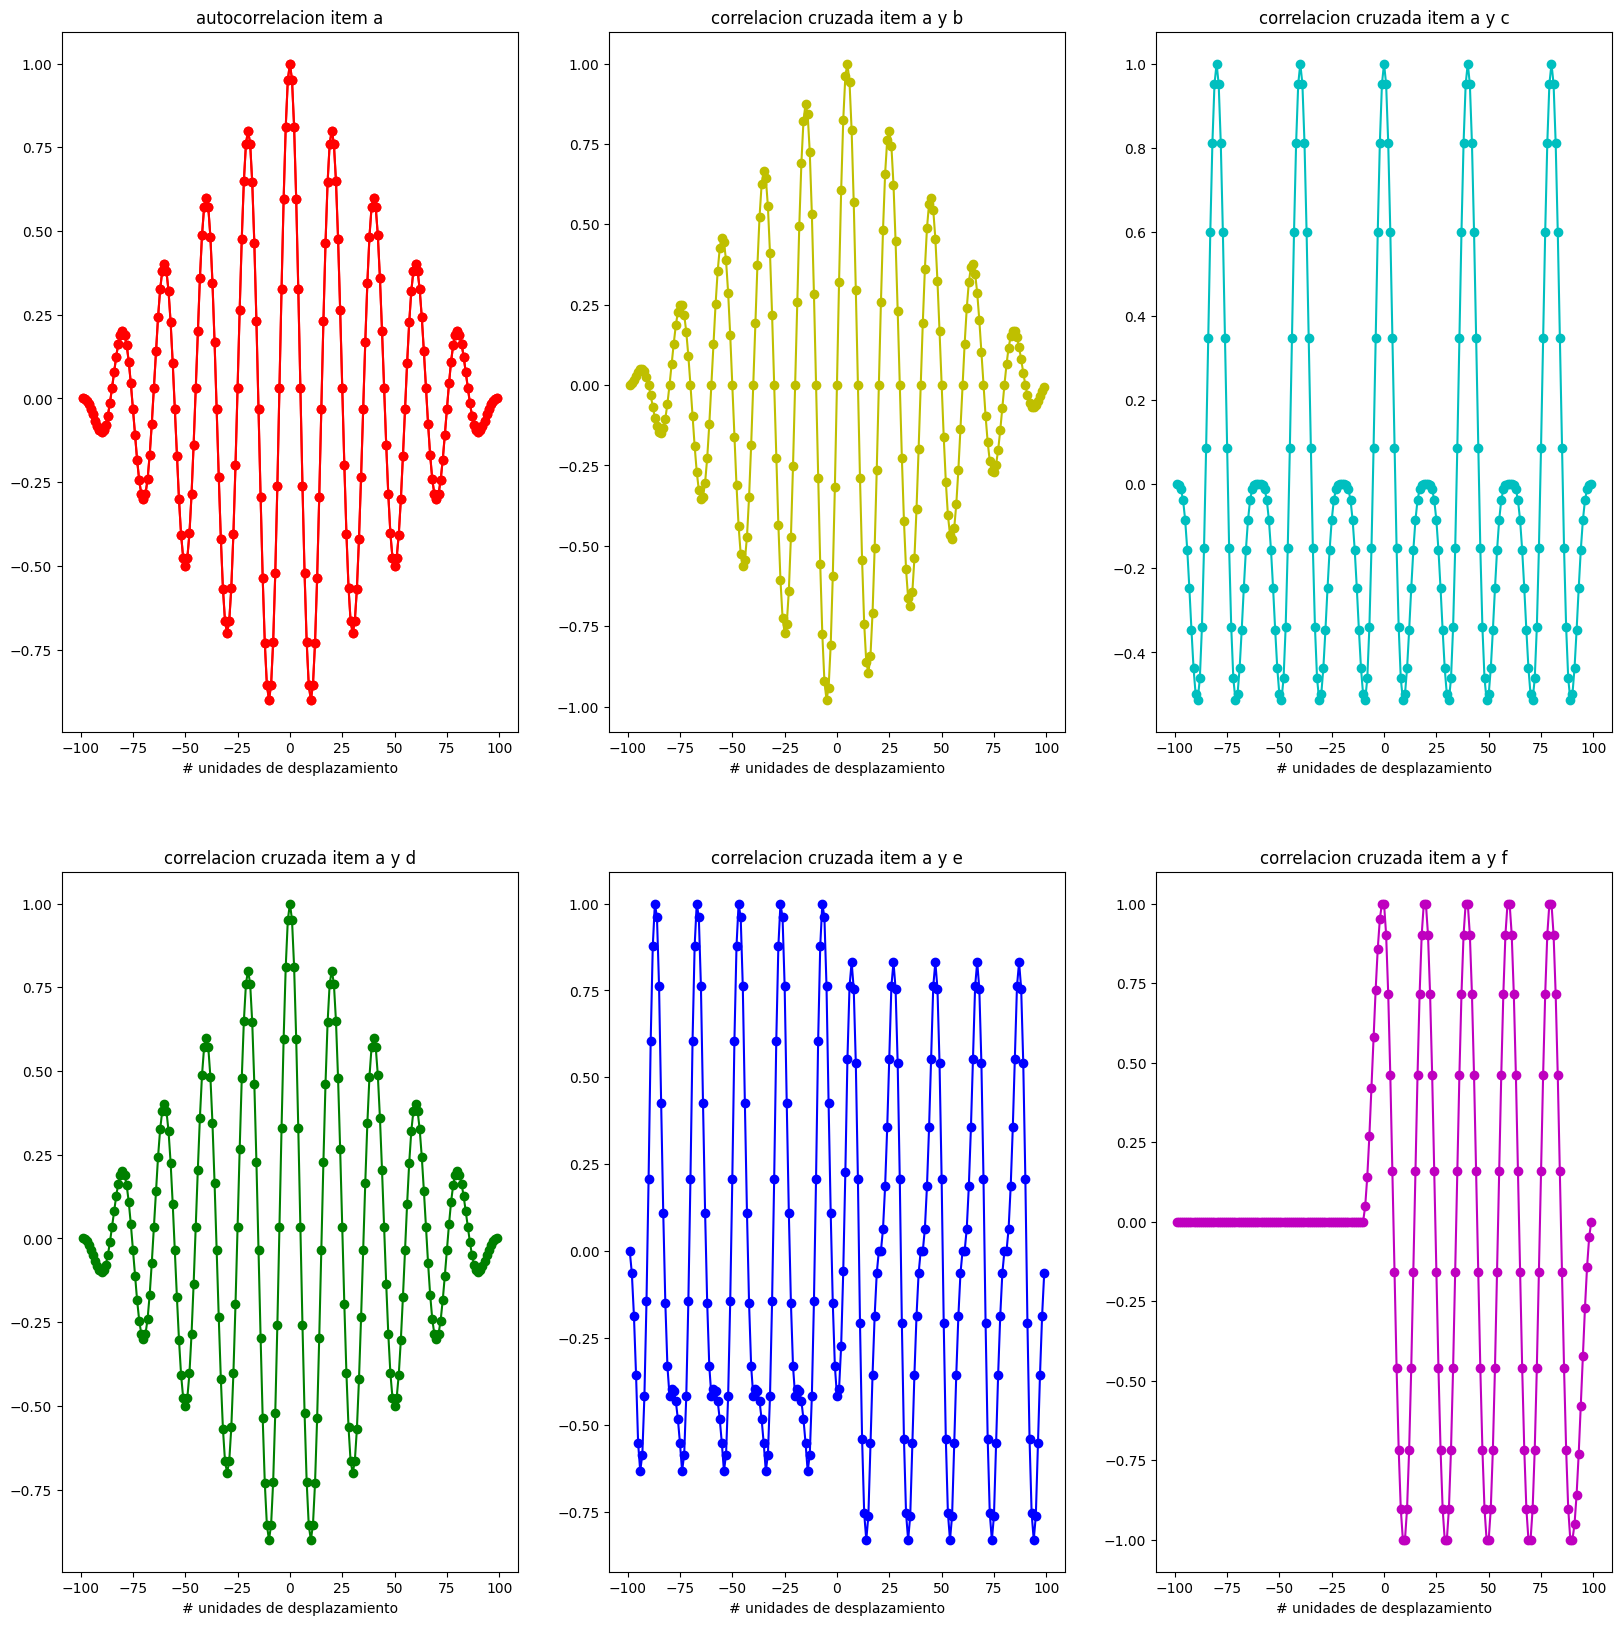

In [6]:
#------------------------------------Ejercicio 3---------------------------------------------------------------
"""3) Graficar la autocorrelación de la primera señal y la correlación entre ésta y las demás.
    scipy tiene funcion de autocorrelacion --> obtener la serie de autocorrelacion
"""

raa= signal.correlate(fa, fa, method="direct")


rab=signal.correlate(fa, fb, method="direct")


rac=signal.correlate(fa, fc, method="direct")


rad=signal.correlate(fa, fd, method="direct")


rae=signal.correlate(fa, fe, method="direct")


raf=signal.correlate(fa, ff, method="direct")


eje = np.arange(-len(fa) + 1, len(fa)) #centro el grafico para ver correctamente la demora
plt.figure(figsize=(20,20))
plt.subplot(2,3,1)
plt.title('autocorrelacion item a')
plt.xlabel('# unidades de desplazamiento (lags)')
plt.plot(eje, raa/max(raa),'o-', color='r') #divido por el maximo para ver la correlacion normalizada


plt.subplot(2,3,1)
plt.title('autocorrelacion item a')
plt.xlabel('# unidades de desplazamiento')
plt.plot(eje,raa/max(raa),'o-', color='r')

plt.subplot(2,3,2)
plt.title('correlacion cruzada item a y b')
plt.xlabel('# unidades de desplazamiento')
plt.plot(eje,rab/max(rab),'o-', color = 'y')

plt.subplot(2,3,3)
plt.title('correlacion cruzada item a y c')
plt.xlabel('# unidades de desplazamiento')
plt.plot(eje, rac/max(rac),'o-', color='c')

plt.subplot(2,3,4)
plt.title('correlacion cruzada item a y d')
plt.xlabel('# unidades de desplazamiento')
plt.plot(eje, rad/max(rad),'o-', color='g')

plt.subplot(2,3,5)
plt.title('correlacion cruzada item a y e')
plt.xlabel('# unidades de desplazamiento')
plt.plot(eje, rae/max(rae),'o-',color ='b')

plt.subplot(2,3,6)
plt.title('correlacion cruzada item a y f')
plt.xlabel('# unidades de desplazamiento')
plt.plot(eje, raf/max(raf),'o-', color='m')

plt.show()



Para demostrar la identidad trigonométrica del producto a la suma del seno, se calcula ambos lados de la igualdad y se grafican los resultados. Se muestra primero el resultado del producto, luego de la suma, y por último la superposición de ambas (dado que la igualdad se cumple, no se pueden distinguir las funciones en el gráfico).

In [ ]:
def mi_funcion_propTrigo(a=np.pi,b=np.pi/4):
    
    #defino el primer lado de la igualdad
    _,xa = mi_funcion_sen(frec=a)
    _,xaa = mi_funcion_sen(frec=b)
    fa=2*xa*xaa
    
    #defino el segundo lado de la igualdad
    _,xb = mi_funcion_cos(frec=(a-b))
    _,xbb = mi_funcion_cos(frec=(a+b))
    fb=xb-xbb 
    
    #grafico
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    fig.suptitle('ITEM 4')
    
    # First subplot
    axes[0].set_title("2*sen(a)*sen(b)")
    axes[0].plot(tt, fa, 'o:', color='m')
    axes[0].set_xlabel('Tiempo [s]')
    axes[0].set_ylabel('Amplitud [V]')
    
    # Second subplot
    axes[1].set_title("cos(a-b)-cos(a+b)")
    axes[1].plot(tt, fb, 'o:', color='b')
    axes[1].set_xlabel('Tiempo [s]')
    axes[1].set_ylabel('Amplitud [V]')
    
    # Third subplot
    axes[2].set_title("Superposicion de graficos")
    axes[2].plot(tt, fa, 'o:')
    axes[2].plot(tt, fb, 'o:')
    axes[2].set_xlabel('Tiempo [s]')
    axes[2].set_ylabel('Amplitud [V]')
        
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
       

"""4) Dada la siguiente propiedad trigonométrica: --> hay una funcion en numpy para comprobar autocorrelacion

2⋅ sin(α)⋅ sin(β) = cos(α-β)-cos(α+β) --> reemplazar por omega t, graficar en ambos casos y demostrar la igualdad

Demostrar la igualdad
Mostrar que la igualdad se cumple con señales sinusoidales, considerando α=ω⋅t, el doble de β (Use la frecuencia que desee).
"""
a=np.pi
b=2*a
ts1.mi_funcion_propTrigo(a,b) #llamo a la funcion y le paso 2 frecuencias en rad/s



In [ ]:
import wave

def mi_funcion_bonus():
    spf = wave.open("sonido_tp.wav", "r")
    
    # Leer archivo WAV
    signal = spf.readframes(-1)
    signal = np.frombuffer(signal, np.int16)
    tt = np.linspace(start = 0, stop = 2.7, num = len(signal))
    
    plt.figure()
    plt.title("Gráfico del sonido")
    plt.xlabel("Tiempo [s]")
    plt.plot(tt, signal)
    plt.show()
    print("Energía del sonido graficado = ", np.sum(signal**2)/1000, "kJ")

mi_funcion_bonus()

# III. *Conclusiones*
En resumen, se considera que se pudieron sintetizar bien las funciones periódicas descriptas en el marco teórico. La mayor dificultad fue establecer la frecuencia de muestreo (*fs*). Para ello, se recurrió al teorema de *Nyquist* (frecuencia de muestreo al menos el doble de la frecuencia de la función) y a partir de allí se estimó la frecuencia “con prueba y error” hasta que la función se graficaba correctamente. 

Los resultados fueron exitosos también al calcular la correlación entre funciones. Esto se puede observar mediante los gráficos. En primer lugar, la autocorrelación cumple con lo esperado, su máximo se encuentra en $\tau$ =0, la función va decreciendo a medida que aumentan las unidades de demora y tiene el mismo periodo que la función original. Las dos ultimas observaciones se cumplen también para la señal sinusoidal desfasada y amplificada, y para la que tiene su potencia limitada, esto ocurre debido a que la señal con la cual se busca la correlación tiene le mismo periodo, y a medida que se demora, se multiplican menos ciclos. PREGUNTAR POR CORRELACION FUNCION MODULADA!!. Por otro lado, la correlación cruzada con las funciones cuadradas (cuadrada y pulso) también presentan resultado esperados, la función tiene sus picos cuando el seno y la función se encuentran en sus máximos.
 y la ortogonalidad, ambos análisis son de suma utilidad a la hora de analizar señales. 

Por último, pero no menos importante, se encuentra el cálculo de la energía del sonido descargado de internet (ejercicio bonus). El análisis de este inciso es aún superficial, ya que persisten dudas respecto al desarrollo. Al tratarse de un ejercicio adicional, se intentó implementar el código con el objetivo de revisarlo y corregirlo.
Desde lo que se ha comprendido hasta el momento, el proceso consiste en descargar una señal continua (analógica), discretizarla mediante código y luego realizar su análisis digital (gráfico y cálculo de energía).
Considero que ambos cálculos son complementarios. Sin la representación visual, sería difícil interpretar cómo se distribuye la energía a lo largo del tiempo. El gráfico aporta contexto y permite identificar zonas de mayor o menor intensidad de valores, lo complementa la lectura del valor energético calculado.
Honestamente, este es un tema que aún me genera dudas, y reconozco que debo profundizar en su estudio para poder realizar un análisis más profundo y enriquecedor.



## IV. *Autoevaluación del aprendizaje*
Para finalizar se realiza una autoevaluación del aprendizaje. 

Debo admitir que resolví la tarea, pero aún tengo algunas dudas sobre los conceptos teóricos desarrollados en el trabajo. El aprendizaje que me llevo fue familiarizarme con las herramientas de trabajo necesarias para la materia. Utilice muchas funciones que no conocía de Python, grafique de distintas formas y realice mi notebook de una manera prolija y ordenada. También aprendí algunos métodos de análisis de señales como la autocorrelación, la potencia y la energía. 

No sé si hay algo puntual que me siga costando, pero creo que son muchos conceptos de golpe, entonces por momentos me sentí muy abrumada con la información y no terminaba de entender que estaba haciendo. Me siento bastante segura a la hora de codear, pero los conceptos teóricos todavía siento que le tengo que dedicar más tiempo y profundidad.

Como comentario final aclaro que utilice inteligencia artificial para la realización del trabajo (en particular *Copilot*), mayoritariamente para la realización de gráficos y código.
